In [1]:
#inport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file
file=pd.read_csv("Reviews.csv")
#get first 10000 datas
data=file.head(10000)
simple_data=data.drop(columns=["Id","ProductId","HelpfulnessNumerator","HelpfulnessDenominator","Time","Summary","Text"])
group=simple_data.groupby(["UserId","ProfileName"])

In [3]:
#calculate score count
result1=group.count()
result1.insert(1,column="Score Count",value=simple_data.groupby(["UserId","ProfileName"]).count())
result1=result1.drop(columns=["Score"])

In [4]:
#calculate score mean
a=simple_data.groupby(["UserId","ProfileName"]).mean()
result1.insert(1,column="Mean Score",value=a["Score"])

In [5]:
result1.sort_values("Score Count",ascending=False).head(10)

,,Score Count,Mean Score
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


In [6]:
result2=simple_data[simple_data["UserId"]=="A1Z54EM24Y40LL"]
c=result2.groupby(["Score"]).count()

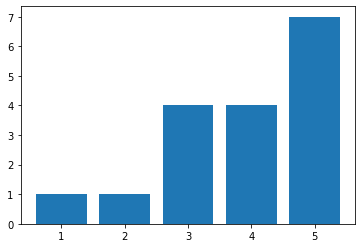

In [7]:
x=[1,2,3,4,5]
y=c["UserId"]
plt.bar(x, y)
plt.show()

In [8]:
#transfer time to date and insert
data.insert(7,column="Date",value=pd.to_datetime(data["Time"],unit='s'))

In [37]:
d=pd.DatetimeIndex(data["Date"]).year
data.insert(2,column="Year",value=d)

In [42]:
result3=data.groupby(["Year"], as_index=False).count()
result3["Score"]

0       2
1      20
2      28
3     122
4     370
5     508
6    1193
7    1621
8    2890
9    3246
Name: Score, dtype: int64

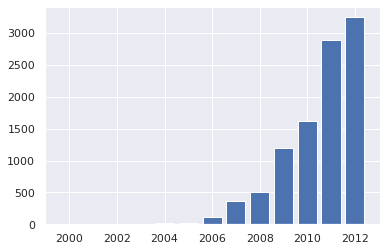

In [46]:
x=result3["Year"]
y=result3["Score"]
plt.bar(x, y)
plt.show()

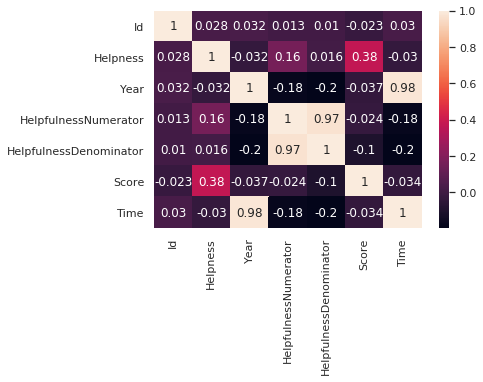

In [45]:
# Plot heatmap using seaborn
data_hm = data
data_hm = data_hm.drop(columns=['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text'])
sns.set()
sns.heatmap(data_hm.corr(), annot=True)

In [12]:
data_5=data[data["HelpfulnessNumerator"]<=data["HelpfulnessDenominator"]]
data.insert(1,column="Helpness",value=data_5["HelpfulnessNumerator"]/data_5["HelpfulnessDenominator"])


In [35]:
data[np.isnan(data["Helpness"])]["Helpness"]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
data

,Id,Helpness,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Date,Time,Summary,Text
0,1,1.000000,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,NaN,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,1.000000,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,1.000000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,NaN,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,NaN,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,NaN,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,NaN,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,2012-05-03,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,1.000000,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,2011-11-23,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,NaN,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,2012-10-26,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
